In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

from utils import *
from matplotlib import pyplot as plt
from pymongo import MongoClient

### Parâmetros do Matplot, Seaborn e Pandas

In [2]:
%matplotlib inline
pd.options.mode.chained_assignment = None 
plt.rcParams['figure.figsize'] = [10, 5]
sns.set(rc={'figure.figsize':(15,10)})

pd.set_option('display.max_columns', 50)

### Recuperação de Datasets do MongoDB

In [68]:
df_infracoes_der_2018_2019 = mongo_to_dataframe("infracoes_der_2018_2019")

In [46]:
df_infracoes_prf_2010_2018 = mongo_to_dataframe("infracoes_prf_2010_2018")

### Infrações DER

In [69]:
dict_veiculos = {'AUTOMOVEL': 'AUTOMÓVEL',
                 'CAMINHONET': 'CAMINHONETE',
                 'CAMINHAO': 'CAMINHÃO',
                 'C. TRATOR': 'CAMINHÃO TRATOR',
                 'CAMINHAO TRATOR': 'CAMINHÃO TRATOR',
                 'ONIBUS': 'ÔNIBUS',
                 'MICROONIBU': 'MICRO-ÔNIBUS',
                 'MICROÔNIBUS': 'MICRO-ÔNIBUS',
                 'MICROONIBUS': 'MICRO-ÔNIBUS',
                 'MOTOCICLET': 'MOTOCICLETA',
                 'UTILITARIO': 'UTILITÁRIO',
                 'S.REBOQUE': 'SEMI-REBOQUE',
                 'MOTOR CASA': 'MOTOR-CASA'}

df_infracoes_der_2018_2019.descricao = df_infracoes_der_2018_2019.descricao.str.strip()
df_infracoes_der_2018_2019.tipo_veiculo = df_infracoes_der_2018_2019.tipo_veiculo.str.upper()
df_infracoes_der_2018_2019.tipo_veiculo = df_infracoes_der_2018_2019.tipo_veiculo.str.strip()
df_infracoes_der_2018_2019.tipo_veiculo = df_infracoes_der_2018_2019.tipo_veiculo.replace(dict_veiculos)
df_infracoes_der_2018_2019.tipo_veiculo.value_counts()

AUTOMÓVEL            581265
CAMINHONETE           65717
CAMIONETA             50535
MOTOCICLETA           40494
UTILITÁRIO            27766
CAMINHÃO              16086
CAMINHÃO TRATOR        9363
MICRO-ÔNIBUS           4185
SEMI-REBOQUE           3870
ÔNIBUS                 3598
MOTONETA               2634
NULL                   1119
REBOQUE                 985
TRICICLO                 57
CICLOMOTOR               55
MOTOR-CASA               16
CHASSI PLATAFORMA         5
INEXISTENTE               5
SIDE-CAR                  4
CHARRETE                  4
TR RODAS                  3
TR MISTO                  2
BICICLETA                 1
QUADRICICLO               1
CARRO-DE-MÃO              1
TR ESTEIRAS               1
BONDE                     1
Name: tipo_veiculo, dtype: int64

In [71]:
tipos_veiculos_drop = ['NULL', 'REBOQUE', 'TRICICLO', 'CICLOMOTOR', 'MOTOR-CASA', 'INEXISTENTE',
                       'CHASSI PLATAFORMA', 'CHARRETE', 'SIDE-CAR', 'TR RODAS', 'TR MISTO', 'TR ESTEIRAS',
                       'CARRO-DE-MÃO', 'BICICLETA', 'BONDE', 'QUADRICICLO']
index_drop = df_infracoes_der_2018_2019[df_infracoes_der_2018_2019['tipo_veiculo'].isin(tipos_veiculos_drop)].index
df_infracoes_der_2018_2019.drop(index_drop , inplace=True)
df_infracoes_der_2018_2019.tipo_veiculo.value_counts()

AUTOMÓVEL          581265
CAMINHONETE         65717
CAMIONETA           50535
MOTOCICLETA         40494
UTILITÁRIO          27766
CAMINHÃO            16086
CAMINHÃO TRATOR      9363
MICRO-ÔNIBUS         4185
SEMI-REBOQUE         3870
ÔNIBUS               3598
MOTONETA             2634
Name: tipo_veiculo, dtype: int64

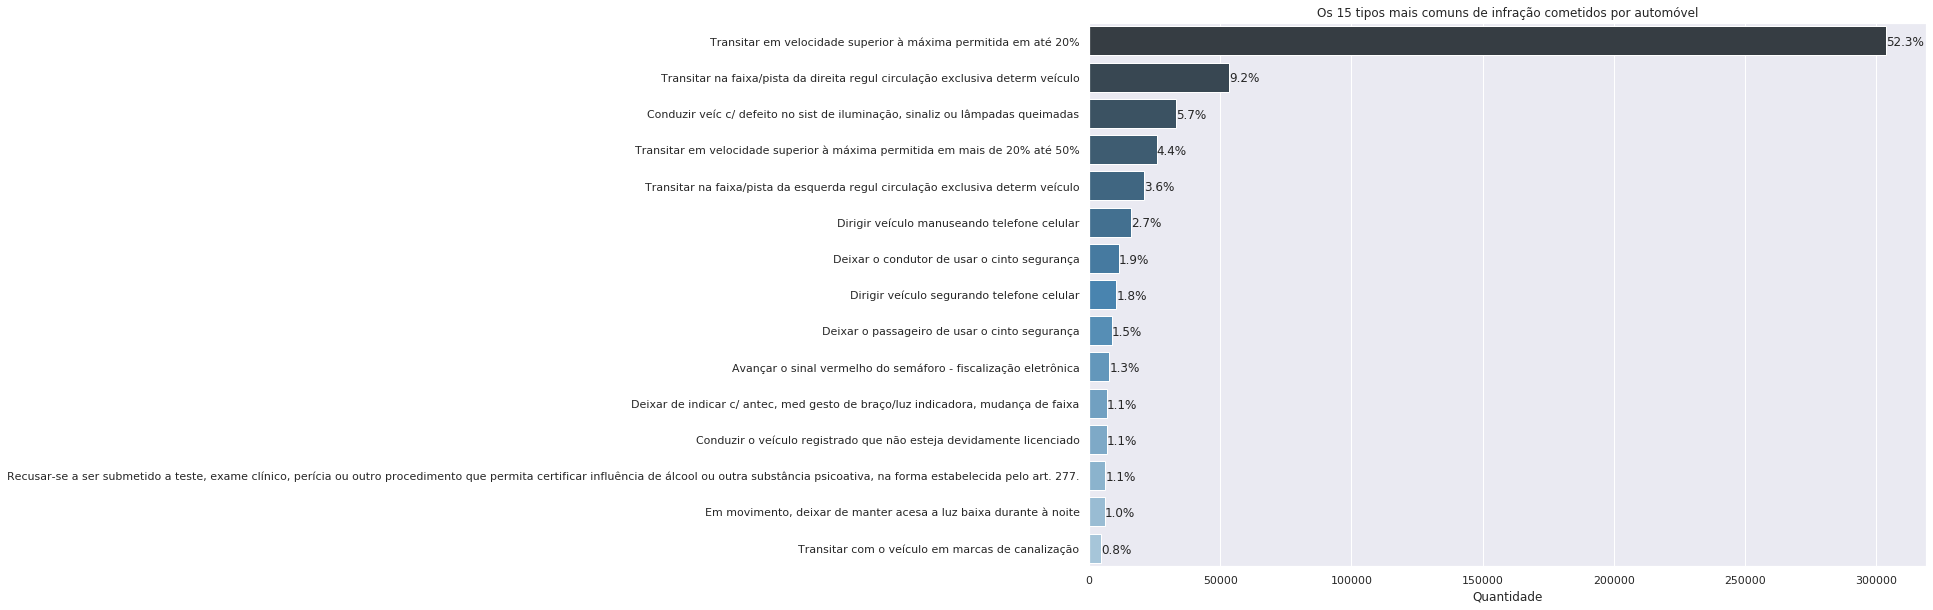

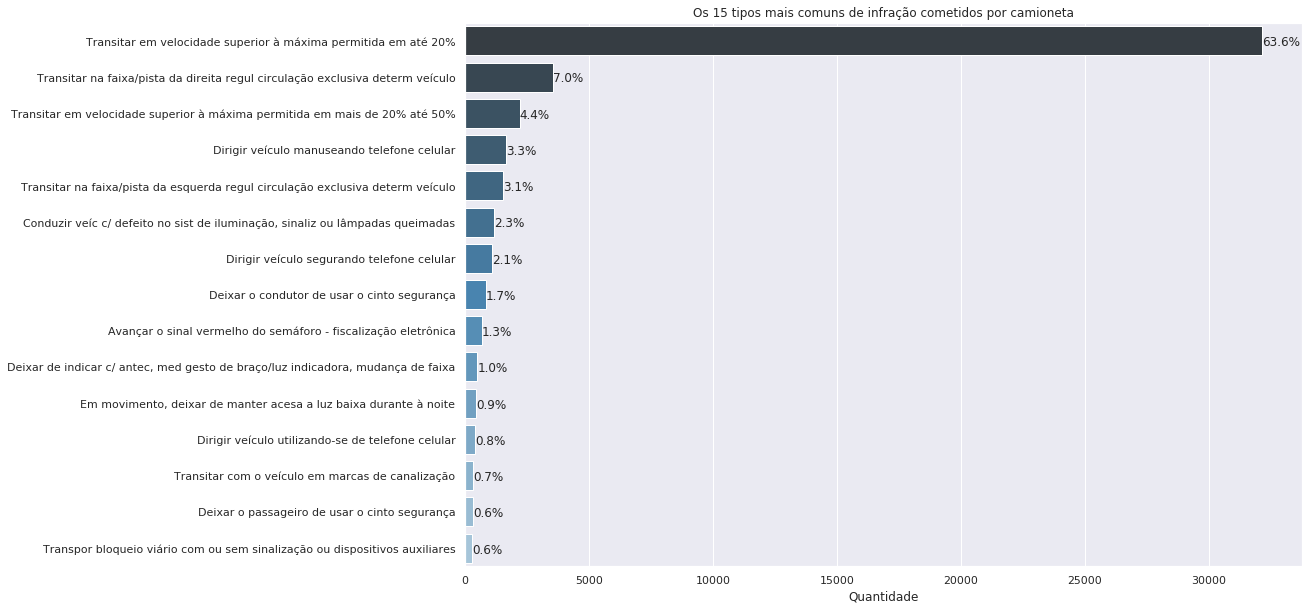

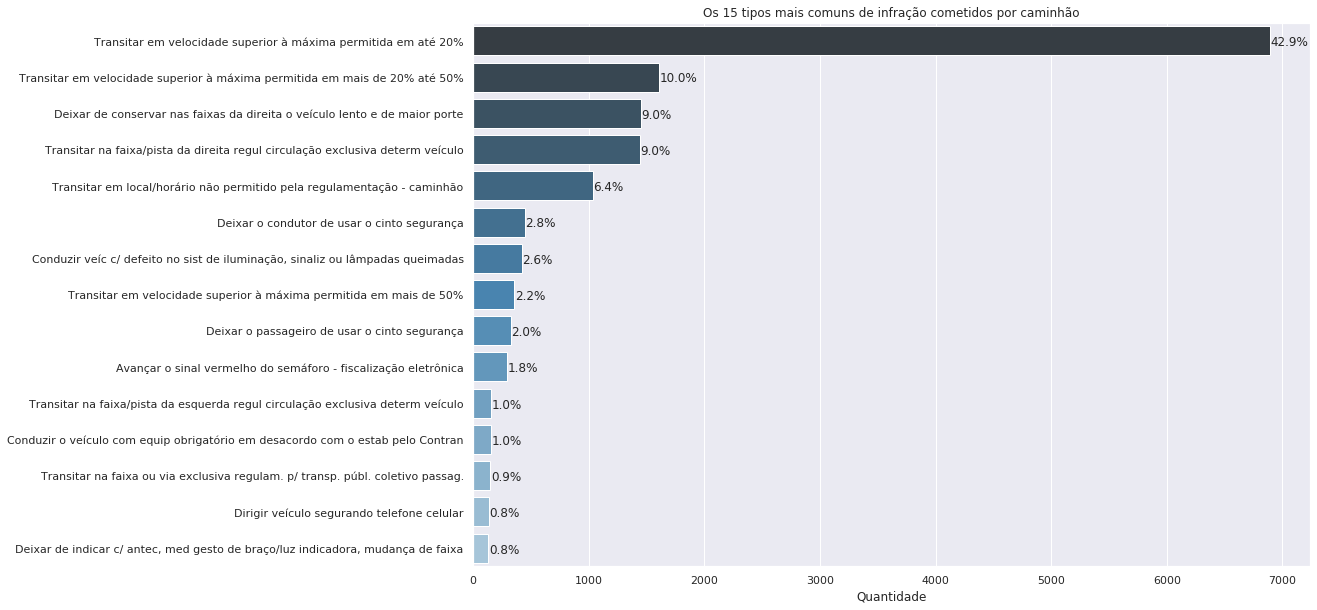

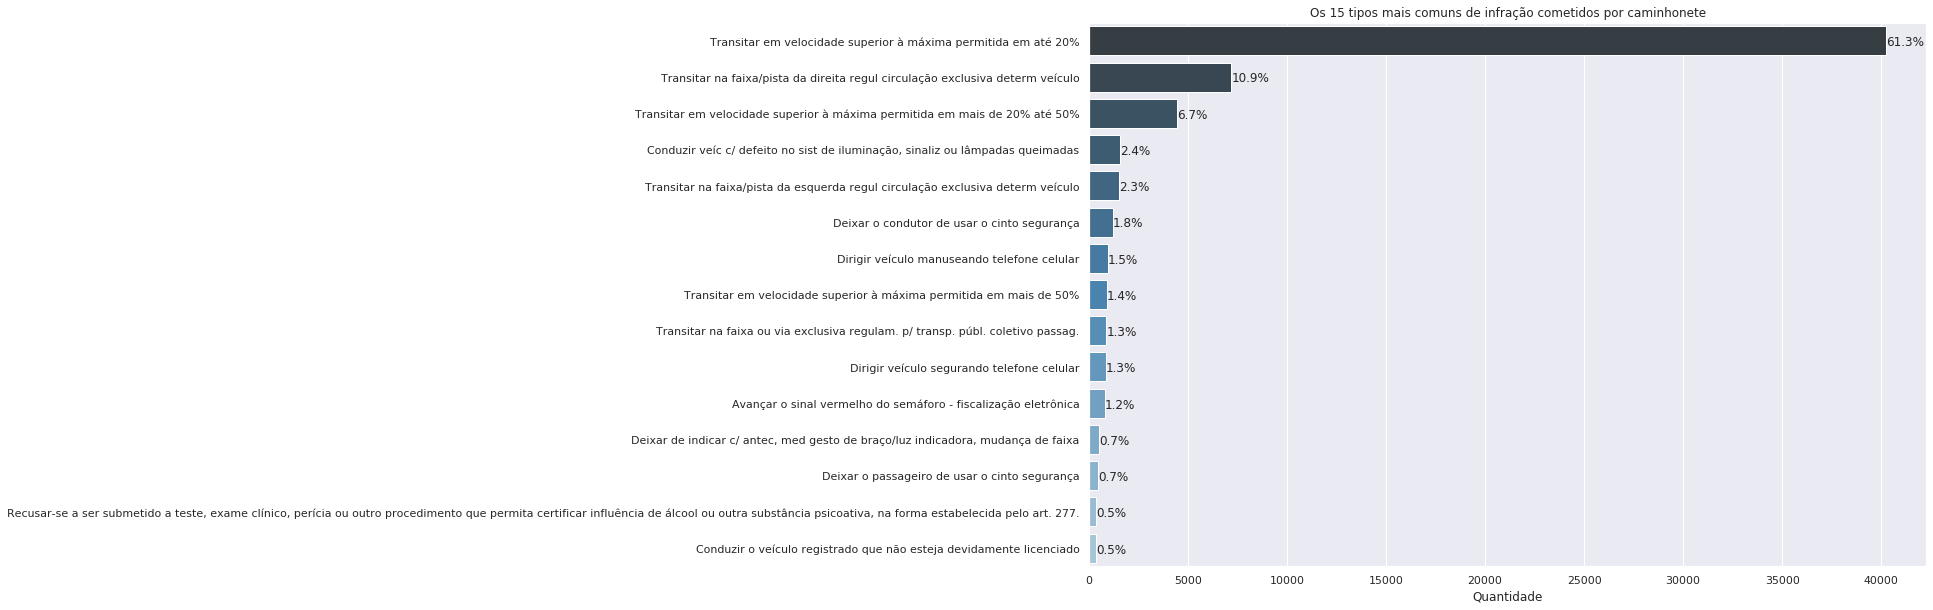

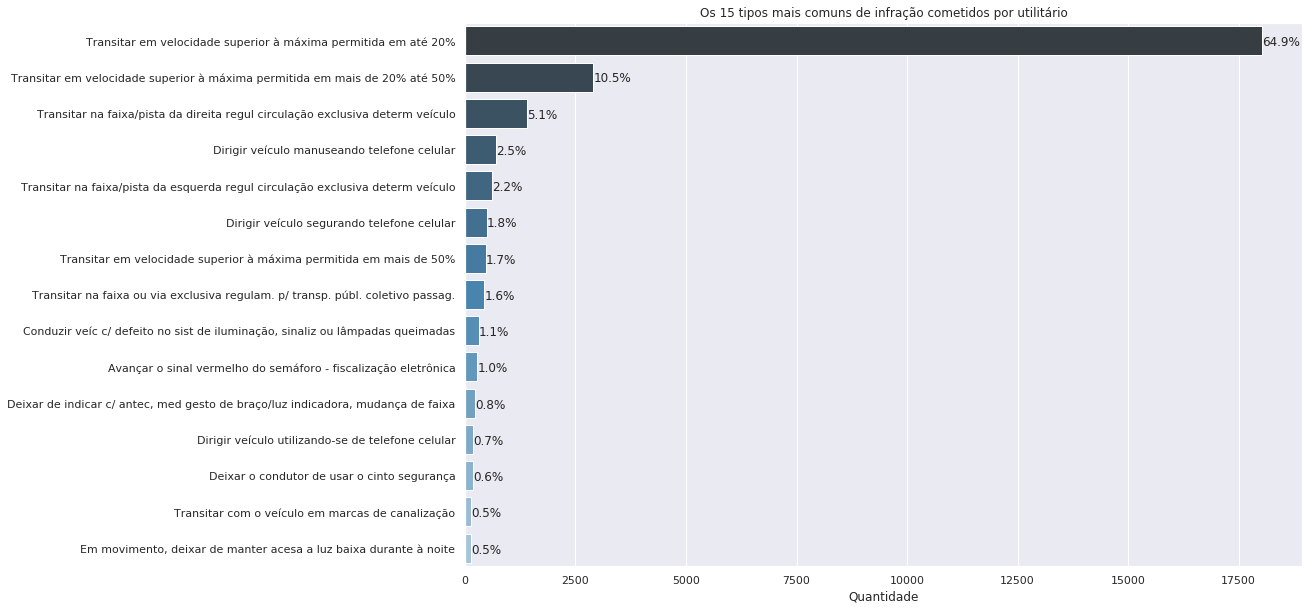

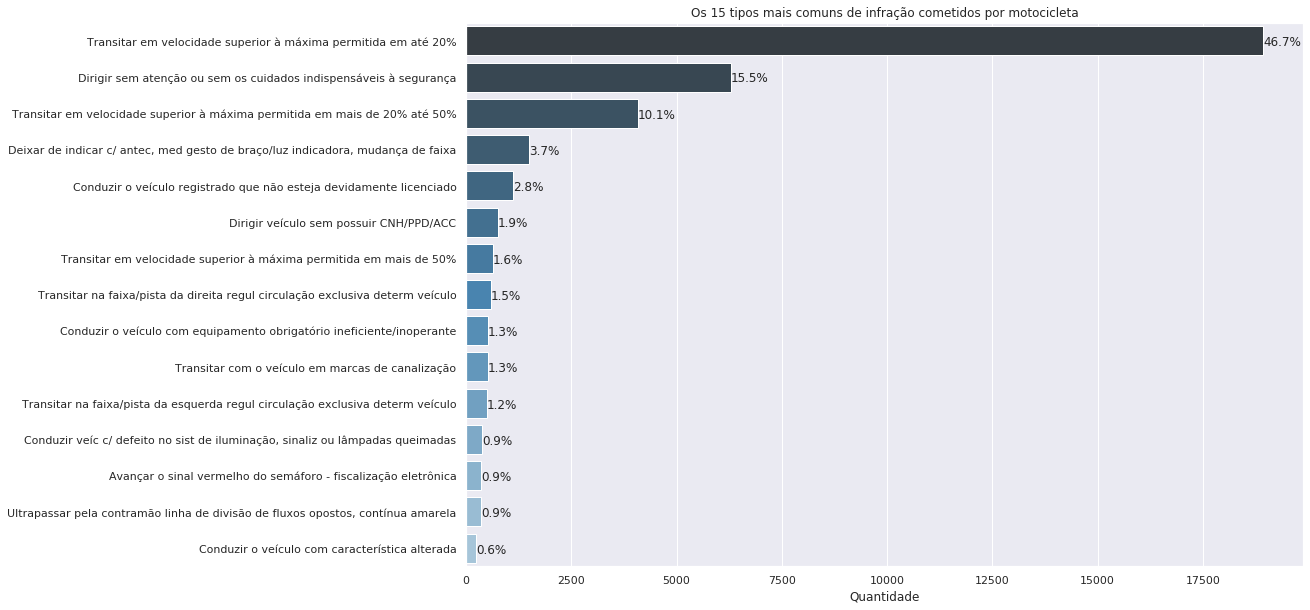

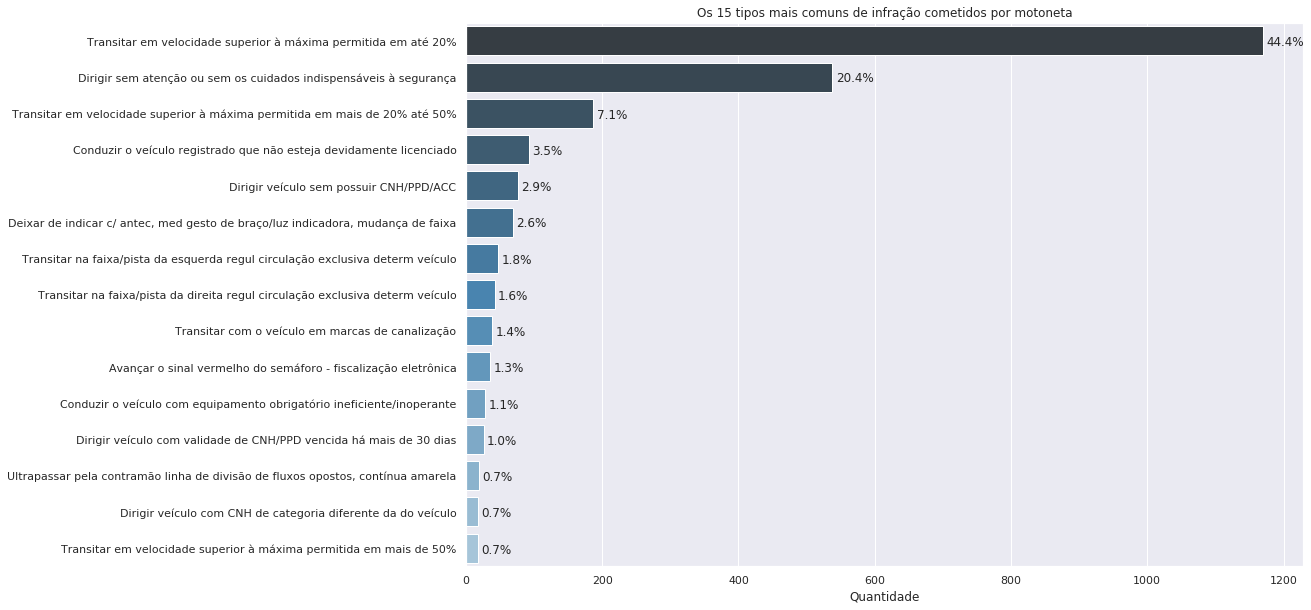

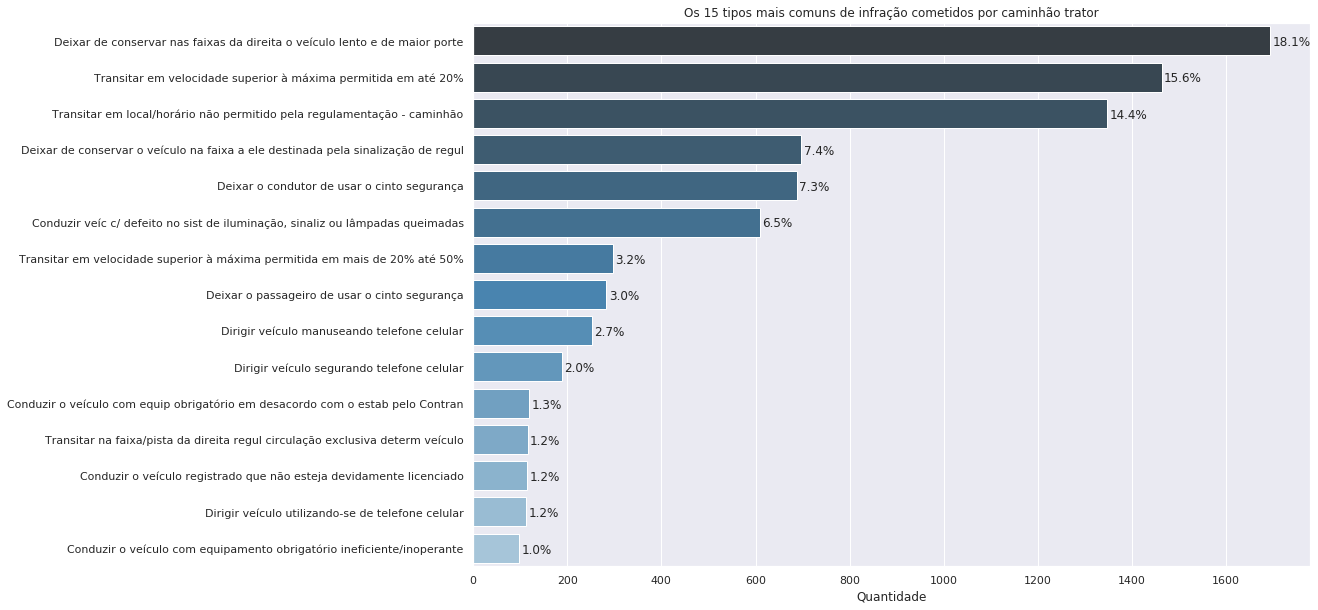

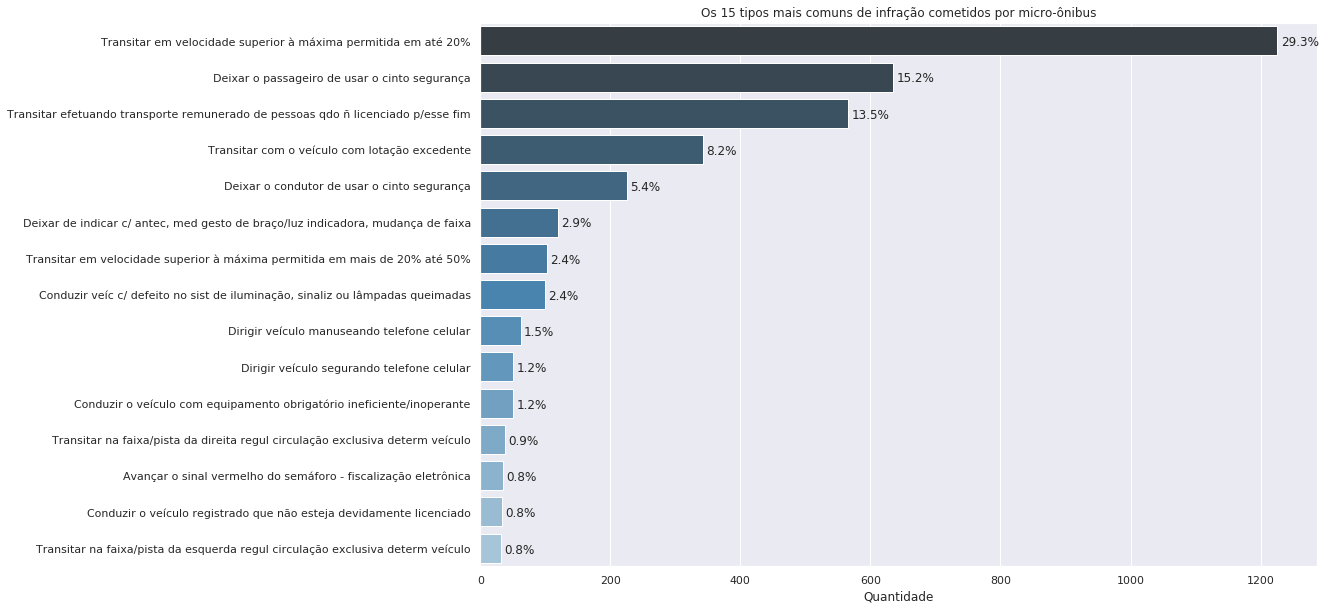

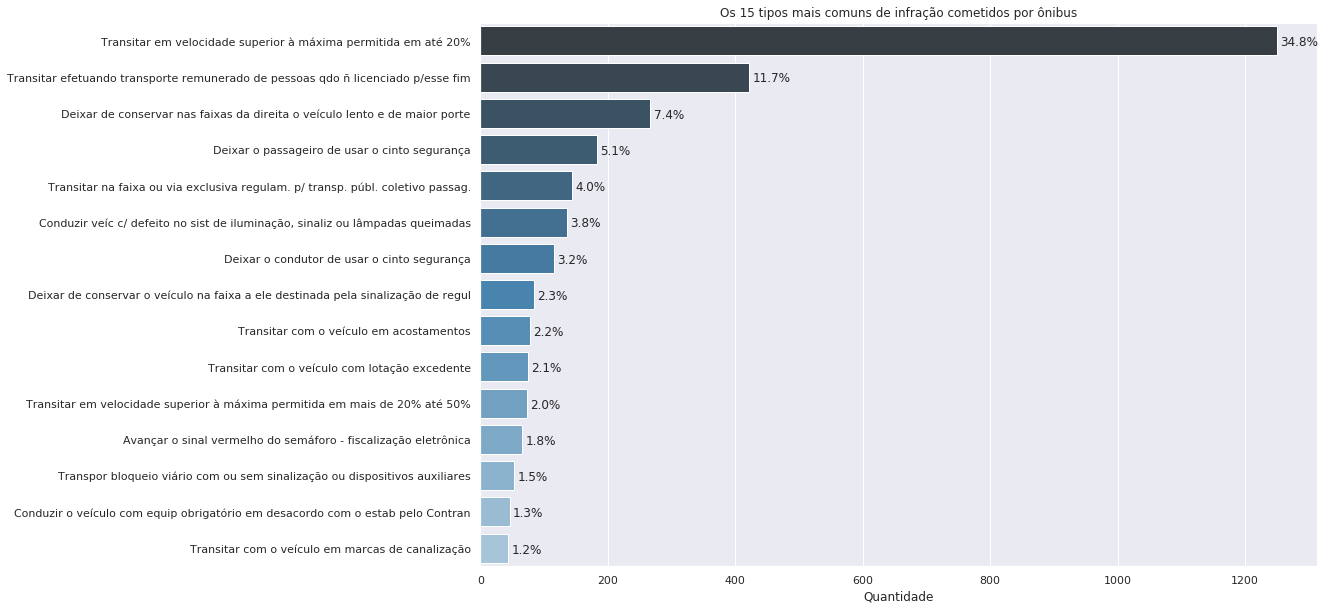

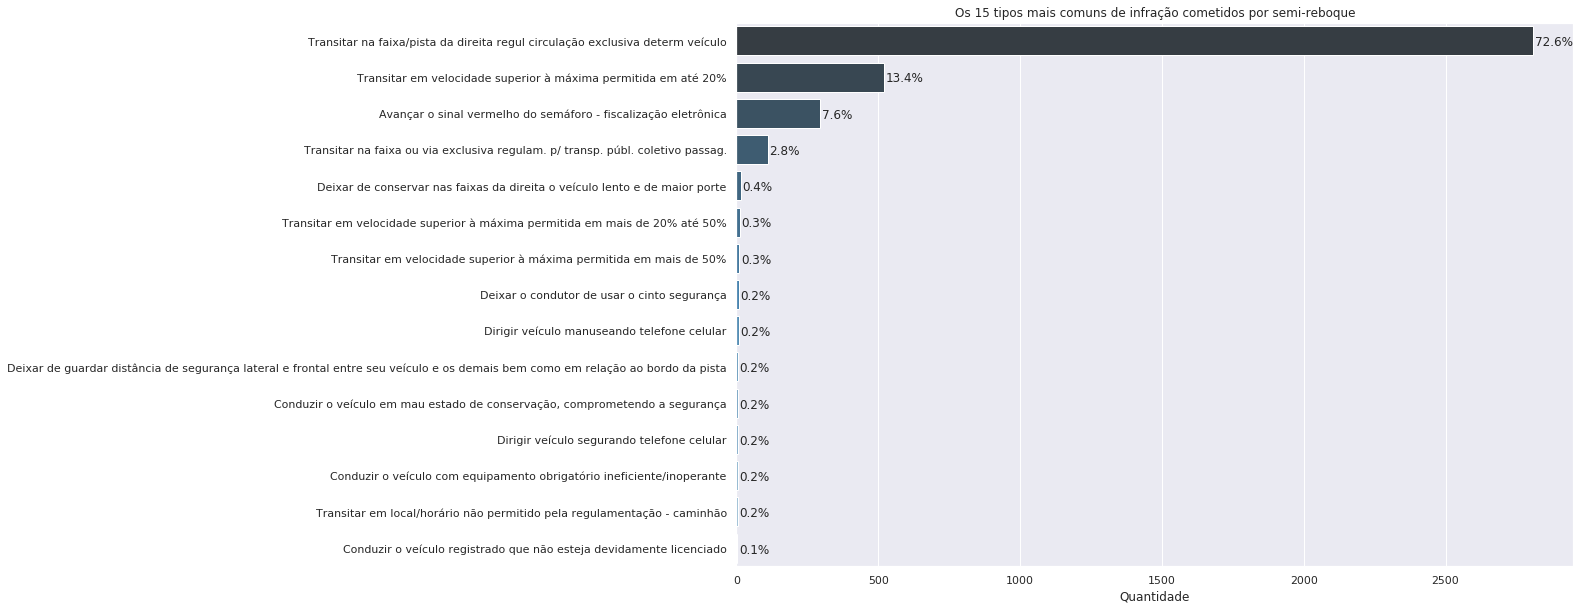

In [72]:
lista_tipos_veiculos = lista = df_infracoes_der_2018_2019.tipo_veiculo.unique().tolist()
lista_tipos_veiculos.pop() # Retira o ultimo valor da lista, que e nan

for tipo_veiculo in lista_tipos_veiculos:
    infracoes = df_infracoes_der_2018_2019.loc[df_infracoes_der_2018_2019['tipo_veiculo'] == tipo_veiculo]
    infracoes = infracoes.groupby('descricao').count().reset_index().sort_values('tipo_infracao', ascending=False)
    infracoes_comuns = infracoes.iloc[[i for i in range(0, 15)]]
    
    grafico = sns.barplot(y = infracoes_comuns['descricao'],
                          x = infracoes_comuns['tipo_infracao'],
                          data = infracoes_comuns,
                          palette = "Blues_d")

    n_infracoes = infracoes_comuns['tipo_infracao'].reset_index().drop(columns='index')
    total = infracoes['tipo_infracao'].sum()
    i = 0
    for p in grafico.patches:
        percentage = '{:.1f}%'.format(100 * n_infracoes['tipo_infracao'][i]/total)
        x = p.get_x() + p.get_width() + 5
        y = p.get_y() + p.get_height() / 1.5
        grafico.annotate(percentage, (x, y))
        i += 1

    plt.title("Os 15 tipos mais comuns de infração cometidos por " + tipo_veiculo.lower())
    plt.xlabel("Quantidade")
    plt.ylabel("")
    plt.show()

### Observações
Para esse experimento, foram selecionados apenas tipos de veículos que possuíssem mais de 2000 amostras. Além disso, os gráficos mostram apenas os 15 tipos de infrações mais comuns de acordo com o tipo do veículo, já que são as mais relevantes.  
  
-